## Car suggestion ML model

Author: Ty

Date: 3/20/19

What kind of car would Jeff want if he only gave us his values?

If he gave us what kind of car he would want, can the model confirm this?

Our friend Jeff said, [8,5,8,3] and that he wants a Sedan.

Now we are going to add a batch job.

In [1]:
#First import pandas so that we can see the data in a dataframe view.
import pandas as pd

In [2]:
#Import the data
#The Index column will be the first column
mydata= pd.read_excel('Car_Data_WIP.xlsx')

In [3]:
#Preview the data. This is a small dataset, so I can show all of it.
mydata

,Record_ID,Name,MPG,Power,Storage_Capacity,Towing,Type,City,State
0,1,Ben,9,6,6,8,SUV,Burbank,CA
1,2,Patrick,9,7,6,5,Sedan,Burbank,CA
2,3,Matt,10,5,7,1,Sedan,Sherman Oaks,CA
3,4,Jared,5,1,6,1,Sedan,Santa Monica,CA
4,5,Andrew,7,8,9,2,Sedan,Burbank,CA
5,6,Aaron,9,6,10,8,Truck,North Hollywood,CA
6,7,Tom,7,7,7,3,Sedan,Torrance,CA
7,8,Philip,6,8,8,5,SUV,Burbank,CA
8,9,Eli,7,5,8,3,Truck,Whittier,CA
9,10,Kirk,8,7,7,1,SUV,Santa Clarita,CA


In [4]:
#Assign the X values
X = mydata[['MPG', 'Power', 'Storage_Capacity', 'Towing']]

In [5]:
#Preview our data
#Now we have our X data ready to Fit into the model
X.head()

,MPG,Power,Storage_Capacity,Towing
0,9,6,6,8
1,9,7,6,5
2,10,5,7,1
3,5,1,6,1
4,7,8,9,2


In [6]:
#Assign the y values
#Alt way is: y = mydata['Type'] #This does a dataframe
y = mydata.Type

In [7]:
#Preview our data
#Now we have our y data ready to Fit into the model
y.head()

0      SUV
1    Sedan
2    Sedan
3    Sedan
4    Sedan
Name: Type, dtype: object

In [8]:
#Step 1: Import the class you plan to use. We are using nearest neighbor here.
from sklearn.neighbors import KNeighborsClassifier

In [9]:
#Step 2: "Instantiate" the "estimator"
#"Estimator" is scikit-learn's term for model
#"Instantiate" means "make an instance of"

knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
#Step 3: Fit the model with data (aka "model training")
#Model is learing the relationship between X and y
#Occurs in-place. So you don't need to assign the results to a new object.
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
#Here is an example of one Out-of-Sample observation we can test
knn.predict([[8,5,8,3]])

array(['Truck'], dtype=object)

Hmm, well he didn't want a truck. Let's explain how this model works and why K-Nearest Neighbor equal to one might not be the best parameter. Let's find a better parameter value.

## Testing our model
Testing our model with the method: Train/Test Split
Here were are going to split our data set into 2 pieces: training and testing sets

Like an 80/20 split

We are going to use Scikit-learns built in train/test split function. We are going to split the X and y into 2 parts

test_size=0.4 means 40% test size and the rest is training.

In [12]:
#Step 1: Split X and y into training and testing sets
#Import metrics to get accuracy rating.
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [14]:
#print the shapes of the new X objects
print (X_train.shape)
print (X_test.shape)

(15, 4)
(4, 4)


In [15]:
#print the shapes of the new y objects
print (y_train.shape)
print (y_test.shape)

(15,)
(4,)


In [16]:
#Repeat for KNN with K=5:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5


In [17]:
#Let's try a range of values for K. 
# try K=1 through K=12
k_range = list(range(1, 12))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

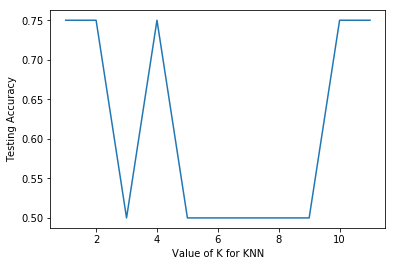

In [18]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [19]:
#Repeat for KNN with a new value:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.75


In [20]:
# instantiate the model with the best known parameters. Make sure to set n
knn = KNeighborsClassifier(n_neighbors=10)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
#Creating our own observation
knn.predict([[8, 5, 8, 3]])

array(['Sedan'], dtype=object)

## Results

The model has X percent confidence that the person would want the predicted type of vehicle based on the data we have collected.

In [21]:
#You can also predict for mulitple observations at once.
#This can be done in bulk. Use Excel or Python to concate.
#Then paste or For loop through the field.
X_new = [[9,5,4,2], [8,5,2,1],[3,6,10,9]]

In [22]:
#Run multiple ones:
#Store the results in a variable array.
Result1 = knn.predict(X_new)

In [23]:
#Let's view our results from the variable array
Result1

array(['Sedan', 'Sedan', 'SUV'], dtype=object)

In [24]:
#Import the untested data.
df1= pd.read_excel('Results_Tester1.xlsx')

In [25]:
#Let's view our data.
df1.head()

,Record_ID,Name,MPG,Power,Storage_Capacity,Towing,City,State
0,100,ice,9,5,4,2,Burbank,CA
1,101,water,8,5,2,1,Torrance,CA
2,102,steam,3,6,10,9,Burbank,CA


In [26]:
#Now let's add our predicted results to our untested data
df1['Result'] = Result1

In [27]:
#Here is our newly tested data with the predicted results.
df1

,Record_ID,Name,MPG,Power,Storage_Capacity,Towing,City,State,Result
0,100,ice,9,5,4,2,Burbank,CA,Sedan
1,101,water,8,5,2,1,Torrance,CA,Sedan
2,102,steam,3,6,10,9,Burbank,CA,SUV
